### INF 510 Fall 2019 Final Project Submission

1.	**The names of team member(s)**:

    Wenyu Qi

2.	**How to run your code (what command-line switches they are, what happens when you invoke the code, etc.)**

    This project requires the following packages:
    - argparse, requests, pandas, ast, datetime, timedelta, matplotlib.pyplot and beautifulsoup
    
    To run this project, make sure the above packages are installed, and then simply clone the repo at https://github.com/qjasmine014/INF510.git and execute this notebook
    
   The command_line is python3 wenyu_qi_hw5.py -source=remote or python3 wenyu_qi_hw5.py -source=local
   
   When you invoke the code, it will determine whether to call the local or the network and then it will get the data. Next it will clean the data. Finally, it will make a diagram.


3.	**Any major “gotchas” to the code (i.e. things that don’t work, go slowly, could be improved, etc.)**
    
    Code is a little tedious, some functions can be merged.

4.  **Anything else you feel is relevant to the grading of your project your project.**

    Because the API is free to use 1,000 times a day, running the code multiple times may cause API acquisition failure.

5. **What did you set out to study?  (i.e. what was the point of your project?  This should be close to your Milestone 1 assignment, but if you switched gears or changed things, note it here.)**

   The purpose of my project is
   
   (1).  Contrast the prediction difference between api and url for future temperature
   
   (2).  Comparison of api and url record difference in past temperature


6. **What did you Discover/what were your conclusions (i.e. what were your findings?  Were your original assumptions confirmed, etc.?)**
   For the past temperature, the values obtained by the api and the website are different, although the differences are not very large.
    
    For the future temperature, the values obtained by the api and the website are very different.
    
    This goes against my own assumptions. In my assumptions, there should be no difference in past values


7. **What difficulties did you have in completing the project?**  

    In the prediction part, url divides the temperature of the future day into day temperature and night temperature. However, the api predicts the temperature for 24 hours, which makes it difficult for me to compare the data and reduces the accuracy of my image.Besides this, I encountered missing data when processing api, which caused me difficulty in storing data.

8. **What skills did you wish you had while you were doing the project?**

    I hope I can also crawl and process the images on the site, not just the text.


9. **What would you do “next” to expand or augment the project?**

    I want to build a temperature prediction model from existing data.

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import argparse
import requests
import ast
from datetime import datetime, timedelta
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt


### transform future_temperature_from_api into data in the same format as future_temperature_from_url

In [4]:
future_temperature_from_api = pd.read_csv('future_temperature_from_api.csv')
day_temperature_list = list()
night_temperature_list = list()
future_dates =list()
for i in range(len(future_temperature_from_api.values)):
    day_temperature = 0
    night_temperature = 0
    the_number_day = 0
    the_number_night = 0
    for j in range(1, len(future_temperature_from_api.values[i])):
        if future_temperature_from_api.values[i][j] != 'None':
            if j < 9:
                night_temperature += float(future_temperature_from_api.values[i][j][:-1])
                the_number_night += 1
            else:
                day_temperature += float(future_temperature_from_api.values[i][j][:-1])
                the_number_day += 1
    day_temperature_list.append(round(day_temperature / the_number_day, 2))
    night_temperature_list.append(round(night_temperature / the_number_night, 2))
    future_dates.append(future_temperature_from_api.values[i][0])
data = {'Day Temperature': day_temperature_list, 'Night Temperature': night_temperature_list}
dataframe_future = pd.DataFrame(data, index=future_dates)
dataframe_future


,Day Temperature,Night Temperature
2019-12-14,59.75,54.79
2019-12-15,57.61,50.37
2019-12-16,59.63,48.42
2019-12-17,59.53,48.17
2019-12-18,55.63,50.35
...,...,...
2020-03-07,61.41,53.89
2020-03-08,61.38,53.82
2020-03-09,61.44,54.13
2020-03-10,61.48,54.18


### transform past_temperature_from_api into data in the same format as past_temperature_from_url

In [5]:
past_temperature_from_api = pd.read_csv('past_temperature_from_api.csv')
high_temperature_list = list()
low_temperature_list = list()
past_dates_format = list()
for i in range(len(past_temperature_from_api.values)):
    temperature_list = list()
    for j in range(1, len(past_temperature_from_api.values[i])):
        if past_temperature_from_api.values[i][j] != 'None':
            temperature_list.append(float(past_temperature_from_api.values[i][j][:-1]))
    high_temperature_list.append(max(temperature_list))
    low_temperature_list.append(min(temperature_list))
    past_dates_format.append(past_temperature_from_api.values[i][0])
past_data = {'Past High Temperature': high_temperature_list, 'Past Low Temperature': low_temperature_list}
dataframe_past = pd.DataFrame(past_data, index=past_dates_format)
dataframe_past

,Past High Temperature,Past Low Temperature
2012-01-01,83.40,49.61
2012-01-02,83.99,51.08
2012-01-03,84.47,53.44
2012-01-04,87.29,54.39
2012-01-05,84.97,57.54
...,...,...
2012-12-27,60.88,45.59
2012-12-28,61.86,43.05
2012-12-29,51.09,43.97
2012-12-30,54.66,40.31


### draw picture of future_temperature_from_url and future_temperature_from_api_cleaned


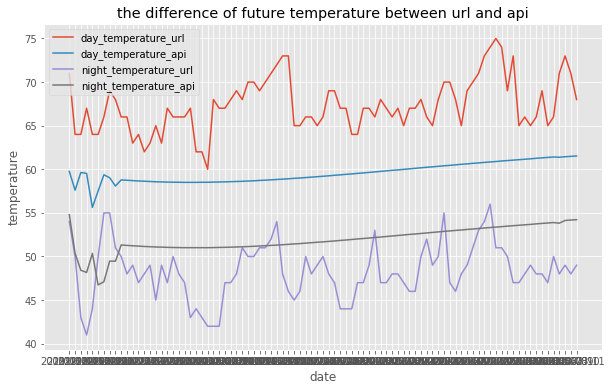

In [6]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(10, 6))
colors1 = '#6D6D6D'

data1 = pd.read_csv('future_temperature_from_url.csv')['Day Temperature'].values.tolist()
for i in range(len(data1)):
    data1[i] = float(data1[i][:-1])
data3 = pd.read_csv('future_temperature_from_url.csv')['Night Temperature'].values.tolist()
for i in range(len(data1)):
    data3[i] = float(data3[i][:-1])

data2 = pd.read_csv('future_temperature_from_api_cleaned.csv')['Day Temperature'].values.tolist()
data4 = pd.read_csv('future_temperature_from_api_cleaned.csv')['Night Temperature'].values.tolist()

plt.plot(future_dates, data1, label='day_temperature_url')
plt.plot(future_dates, data2, label='day_temperature_api')
plt.plot(future_dates, data3, label='night_temperature_url')
plt.plot(future_dates, data4, label='night_temperature_api')
plt.title('the difference of future temperature between url and api')
plt.xlabel('date')
plt.ylabel('temperature')
plt.legend()
plt.savefig('future_temperature.png', bbox_inches='tight', dpi=300)


### draw picture of past_temperature_from_url and past_temperature_from_api_cleaned

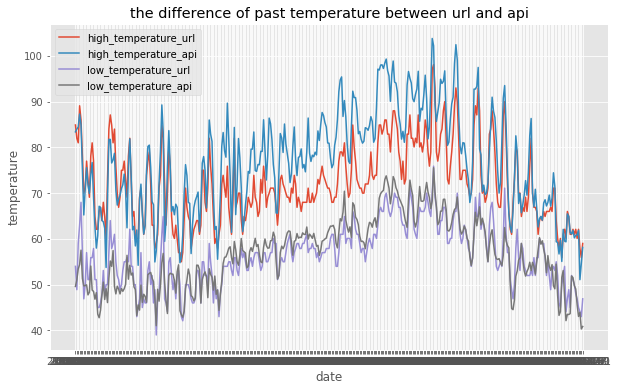

In [9]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(10, 6))
colors1 = '#6D6D6D'

data1 = pd.read_csv('past_temperature_from_url.csv')['Past High Temperature'].values.tolist()
for i in range(len(data1)):
    data1[i] = float(data1[i][:-1])
data3 = pd.read_csv('past_temperature_from_url.csv')['Past Low Temperature'].values.tolist()
for i in range(len(data1)):
    data3[i] = float(data3[i][:-1])

data2 = pd.read_csv('past_temperature_from_api_cleaned.csv')['Past High Temperature'].values.tolist()
data4 = pd.read_csv('past_temperature_from_api_cleaned.csv')['Past Low Temperature'].values.tolist()

plt.plot(past_dates_format, data1, label='high_temperature_url')
plt.plot(past_dates_format, data2, label='high_temperature_api')
plt.plot(past_dates_format, data3, label='low_temperature_url')
plt.plot(past_dates_format, data4, label='low_temperature_api')
plt.title('the difference of past temperature between url and api')
plt.xlabel('date')
plt.ylabel('temperature')
plt.legend()
plt.savefig('past_temperature.png', bbox_inches='tight', dpi=300)